In [0]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import pyspark.sql.functions as f
from pyspark.sql.types import *

In [0]:
p5_rfm_input_pd = spark.read.parquet('/dbfs/FileStore/item_optimization/optimization/cltv_actual_v_predicted')

In [0]:
df = p5_rfm_input_pd[p5_rfm_input_pd.duration_holdout == 30].toPandas()
df['diff'] =df['frequency_holdout']-df['apply_pred_purch']

In [0]:
raw = spark.read.parquet(f"abfss://personloyalty@sa8451dbxadhocprd.dfs.core.windows.net/MAI/CLTV/202205/txn_detail")
raw.limit(10).display()

ehhn,lifecycle_cnt,trn_dt,visits,units,sales,date,trip_window,churn_trigger,vintage_year,first_modality,starget,socs_score,socs_seg,final_seg_code,funlo_rollup_desc,convenience_dim_seg,quality_dim_seg,health_dim_seg,price_dim_seg,inspiration_dim_seg,div_name,banner,banner_num,aiq_birth_year,presence_of_children,aiq_education,generation,ethn,income
298599760,1,20170123,1,7,13.61,2017-01-23,6,false,2016,instore,HA,0.0413,L,6,Non-Loyal,M,H,H,M,L,null,Other,1,0,U,U,U,U,U
142535983,0,20150617,1,8,12.23,2015-06-17,2,false,2016,instore,HA,0.34656,M,5,Non-Loyal,M,H,M,L,L,QUALITY FOOD CENTERS,Other,1,1965,U,BACHELOR DEGREE,Gen X,WHITE,125k+
194492765,2,20201219,1,32,98.2,2020-12-19,17,false,2016,instore,FFL,0.63157,H,1,Loyal,M,H,M,M,M,QUALITY FOOD CENTERS,Other,1,1951,U,HS DEGREE,Baby Boomers,WHITE,26-50k
316603546,0,20210222,1,12,33.51,2021-02-22,10,false,2016,instore,FFL,0.27192,M,4,Opportunity,M,M,M,M,L,NASHVILLE,Kroger,0,1947,U,HS DEGREE,Baby Boomers,WHITE,26-50k
42869059,0,20150306,2,8,25.73,2015-03-06,1,false,2016,instore,LTL,0.88433,H,1,Loyal,M,M,M,M,H,"FRY'S OF ARIZONA, INC",Other,1,1968,Y,BACHELOR DEGREE,Gen X,WHITE,125k+
90541539,0,20141031,1,16,57.93,2014-10-31,26,false,2016,instore,LTL,0.75634,H,2,Loyal,H,M,M,M,M,ATLANTA,Kroger,0,0,U,U,U,U,U
101304397,0,20211207,1,9,38.42,2021-12-07,7,false,2017,instore,LTL,0.54363,H,2,Loyal,M,M,M,M,M,COLUMBUS,Kroger,0,1985,Y,BACHELOR DEGREE,Millenials,WHITE,51-75k
142535983,0,20170410,1,3,6.55,2017-04-10,8,false,2016,instore,HA,0.34656,M,5,Non-Loyal,M,H,M,L,L,QUALITY FOOD CENTERS,Other,1,1965,U,BACHELOR DEGREE,Gen X,WHITE,125k+
210251501,1,20161031,1,3,6.39,2016-10-31,4,false,2016,instore,null,null,null,null,null,null,null,null,null,null,null,Other,1,0,U,U,U,U,U
283928423,0,20170404,1,7,10.71,2017-04-04,14,false,2016,instore,DG,0.04519,M,6,Non-Loyal,L,M,M,M,L,null,Other,1,1954,Y,BACHELOR DEGREE,Baby Boomers,WHITE,125k+


In [0]:
raw_before_holdout = raw.filter(raw.date < '2022-05-19')

In [0]:
avg = raw_before_holdout.groupby('ehhn').agg(((f.sum('visits'))/(f.datediff(f.max('date'), f.min('date')))).alias('avg_visits')).toPandas()

In [0]:
ndf = pd.merge(df, avg, how='inner', on = 'ehhn')

In [0]:
ndf = ndf[ndf['frequency_holdout']!=ndf['apply_pred_purch']]
ndf = ndf[ndf.total_spend_cal >0]
ndf['absdiff'] = np.abs(ndf['frequency_holdout']-ndf['apply_pred_purch'])
ndf['reldiff'] = ndf.absdiff/ndf.avg_visits

Out[9]:

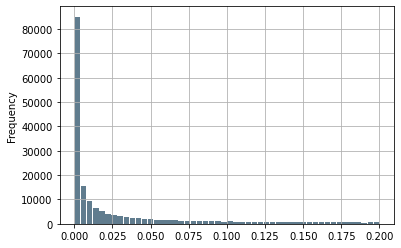

<AxesSubplot:ylabel='Frequency'>

In [0]:
ndf.reldiff.plot.hist(grid=True, bins=50, rwidth=0.9, color='#607c8e', range = (0.0001,0.2))

Out[10]:

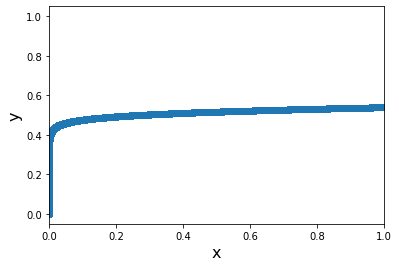

Text(0, 0.5, 'y')

In [0]:
x=ndf.reldiff
x=np.sort(x)
n = x.size
y = np.arange(1, n+1) / n
plt.scatter(x=x, y=y);
#plt.ylim([0.9995, 1.00001])
plt.xlim([0, 1])
plt.xlabel('x', fontsize=16)
plt.ylabel('y', fontsize=16)

In [0]:
[sum(ndf.reldiff>0.1)/ndf.size, sum(ndf.reldiff>0.1), ndf.size]

Out[11]: [0.030816282930043543, 542783, 17613513]

In [0]:
tdf = ndf[ndf.reldiff>0.1]
tdf.head(10)

Out[14]:

,ehhn,frequency_cal,recency_cal,T_cal,total_spend_cal,avg_spend_cal,frequency_holdout,tot_spend_holdout,avg_spend_holdout,duration_holdout,analysis_end_dt,holdout_start_dt,apply_pred_purch,diff,avg_visits,absdiff,reldiff
0,285491739,29.0,953.0,1031.0,1791.24,61.308276,0.0,0.00,0.000000,30,06182022,05192022,0.663884,-0.663884,0.033578,0.663884,19.771306
2,308320342,899.0,3059.0,3062.0,19595.53,21.790044,8.0,347.38,43.422500,30,06182022,05192022,8.719227,-0.719227,0.337038,0.719227,2.133964
3,242602527,489.0,3054.0,3059.0,11997.80,24.497014,3.0,87.03,29.010000,30,06182022,05192022,4.745061,-1.745061,0.169941,1.745061,10.268623
5,345121520,30.0,1407.0,1465.0,5563.66,182.424667,1.0,383.47,383.470000,30,06182022,05192022,0.572574,0.427426,0.024165,0.427426,17.687913
6,146354484,2311.0,3060.0,3061.0,54717.34,23.621090,29.0,810.22,27.938621,30,06182022,05192022,22.440249,6.559751,1.633007,6.559751,4.016978
7,35135800471,1.0,3.0,153.0,79.96,45.610000,0.0,0.00,0.000000,30,06182022,05192022,0.082322,-0.082322,0.666667,0.082322,0.123483
9,25842900338,18.0,459.0,482.0,531.88,28.258333,0.0,0.00,0.000000,30,06182022,05192022,1.075273,-1.075273,0.050109,1.075273,21.458710
10,337307311,378.0,1609.0,1613.0,13700.97,36.180026,4.0,176.62,44.155000,30,06182022,05192022,6.908398,-2.908398,0.239901,2.908398,12.123348
11,194465648,282.0,3040.0,3047.0,14990.33,53.298972,6.0,328.40,54.733333,30,06182022,05192022,2.747615,3.252385,0.105263,3.252385,30.897662
13,27214000123,1.0,54.0,460.0,54.27,15.360000,0.0,0.00,0.000000,30,06182022,05192022,0.017022,-0.017022,0.037037,0.017022,0.459595


In [0]:
sdf=spark.createDataFrame(tdf)
sdf.limit(10).display()

ehhn,frequency_cal,recency_cal,T_cal,total_spend_cal,avg_spend_cal,frequency_holdout,tot_spend_holdout,avg_spend_holdout,duration_holdout,analysis_end_dt,holdout_start_dt,apply_pred_purch,diff,avg_visits,absdiff,reldiff
285491739,29.0,953.0,1031.0,1791.2399999999998,61.30827586206895,0.0,0.0,0.0,30,06182022,05192022,0.6638843618878573,-0.6638843618878573,0.033578174186778595,0.6638843618878573,19.77130615247275
308320342,899.0,3059.0,3062.0,19595.53000000001,21.790044493882103,8.0,347.38000000000005,43.42250000000001,30,06182022,05192022,8.71922733194147,-0.7192273319414699,0.33703824779339653,0.7192273319414699,2.1339635387089784
242602527,489.0,3054.0,3059.0,11997.800000000016,24.497014314928457,3.0,87.03,29.01,30,06182022,05192022,4.745060640241212,-1.7450606402412117,0.16994106090373282,1.7450606402412117,10.268622726968516
345121520,30.0,1407.0,1465.0,5563.66,182.42466666666667,1.0,383.47,383.47,30,06182022,05192022,0.5725735362384856,0.4274264637615144,0.024164889836531627,0.4274264637615144,17.687912779777964
146354484,2311.0,3060.0,3061.0,54717.34,23.62109043704024,29.0,810.2199999999999,27.93862068965517,30,06182022,05192022,22.440248674768892,6.559751325231108,1.6330065359477124,6.559751325231108,4.016977997840143
35135800471,1.0,3.0,153.0,79.96000000000001,45.61,0.0,0.0,0.0,30,06182022,05192022,0.08232191875953372,-0.08232191875953372,0.6666666666666666,0.08232191875953372,0.12348287813930059
25842900338,18.0,459.0,482.0,531.88,28.258333333333333,0.0,0.0,0.0,30,06182022,05192022,1.0752730288123482,-1.0752730288123482,0.05010893246187364,1.0752730288123482,21.458709574994252
337307311,378.0,1609.0,1613.0,13700.969999999992,36.180026455026436,4.0,176.62,44.155,30,06182022,05192022,6.9083978899971346,-2.9083978899971346,0.2399005593536358,2.9083978899971346,12.123347681361112
194465648,282.0,3040.0,3047.0,14990.33,53.298971631205674,6.0,328.40000000000003,54.73333333333334,30,06182022,05192022,2.747614528766145,3.252385471233855,0.10526315789473684,3.252385471233855,30.897661976721622
27214000123,1.0,54.0,460.0,54.269999999999996,15.36,0.0,0.0,0.0,30,06182022,05192022,0.017022041881858505,-0.017022041881858505,0.037037037037037035,0.017022041881858505,0.45959513081017966


In [0]:
sdf.write.mode('overwrite').parquet('abfss://users@sa8451labsdev.dfs.core.windows.net/j604983/extremecases_new.parquet')

In [0]:
hshd_df = spark.read.parquet('abfss://users@sa8451labsdev.dfs.core.windows.net/j604983/extremecases.parquet')
ehhn_list = list(hshd_df.select(f.col('ehhn')).toPandas().ehhn)

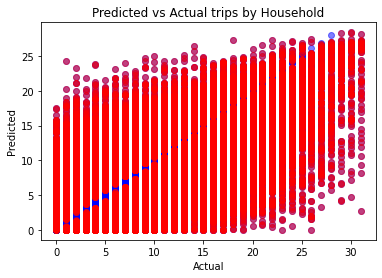

In [0]:
import matplotlib.pyplot as plt
colored_data = df[df['ehhn'].isin(ehhn_list)]
plt.scatter(df['frequency_holdout'], df['apply_pred_purch'], c='blue', alpha=0.5)
plt.scatter(colored_data['frequency_holdout'], colored_data['apply_pred_purch'], c='red', alpha=0.5)
plt.ylabel('Predicted')
plt.xlabel('Actual')
plt.title('Predicted vs Actual trips by Household')
plt.show()

/databricks/python/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
 warnings.warn(

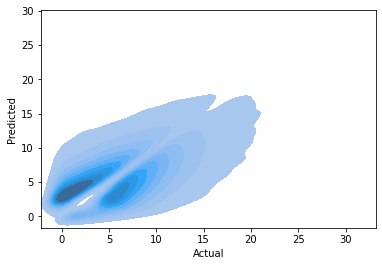

In [0]:
import seaborn as sns
import pandas as pd

# Create a 2D density plot using seaborn
ax = sns.kdeplot(colored_data['frequency_holdout'], colored_data['apply_pred_purch'], shade=True)
ax.set(xlabel='Actual', ylabel='Predicted')


# Show the plot
plt.show()


/databricks/python/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
 warnings.warn(

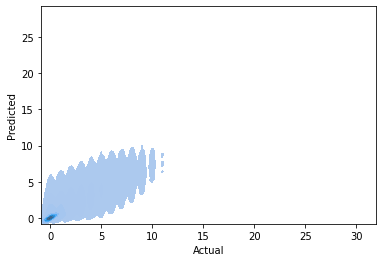

In [0]:
# Create a 2D density plot using seaborn
sampled_df = df.sample(n=1000000)

ax = sns.kdeplot(sampled_df['frequency_holdout'], sampled_df['apply_pred_purch'], shade=True)
ax.set(xlabel='Actual', ylabel='Predicted')

# Show the plot
plt.show()